**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to 100 so that Canvas gives the same weight to Assignments 2-6.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT to help with this assignment.** (Unless the question specifically requests it, the use of ChatGPT is **optional**.) However, if you do use ChatGPT to help with a particular question, you must submit a full transcript of all your interactions with ChatGPT in the form of screenshots embedded in the text cells provided. You must also do this on your own &mdash; using the results of another person's ChatGPT session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of ChatGPT's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

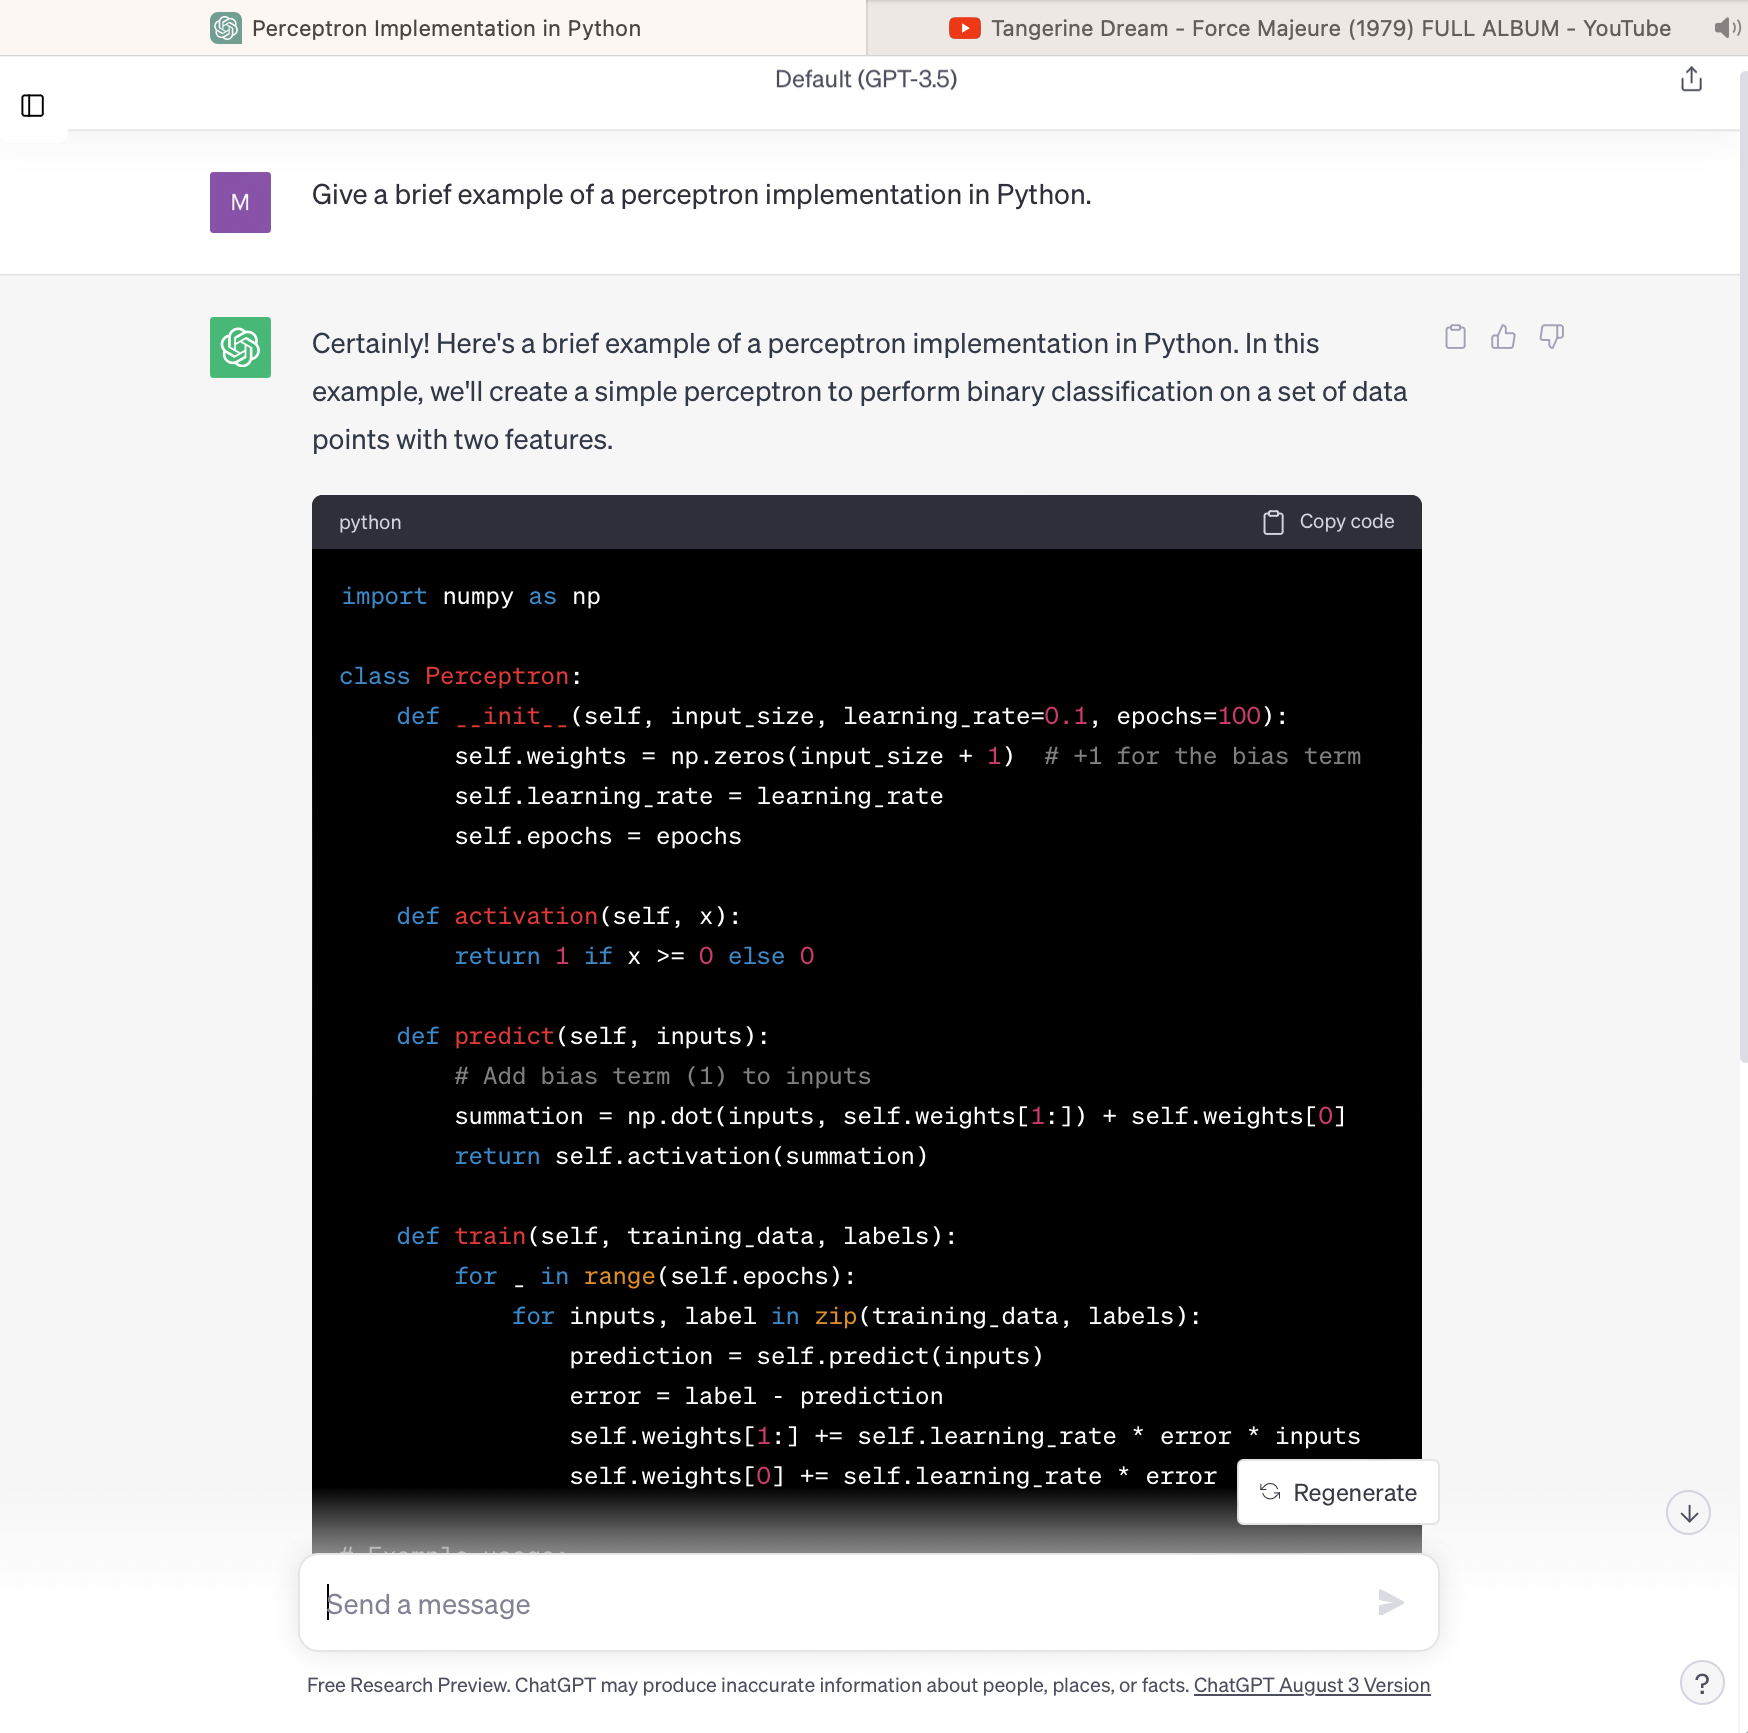

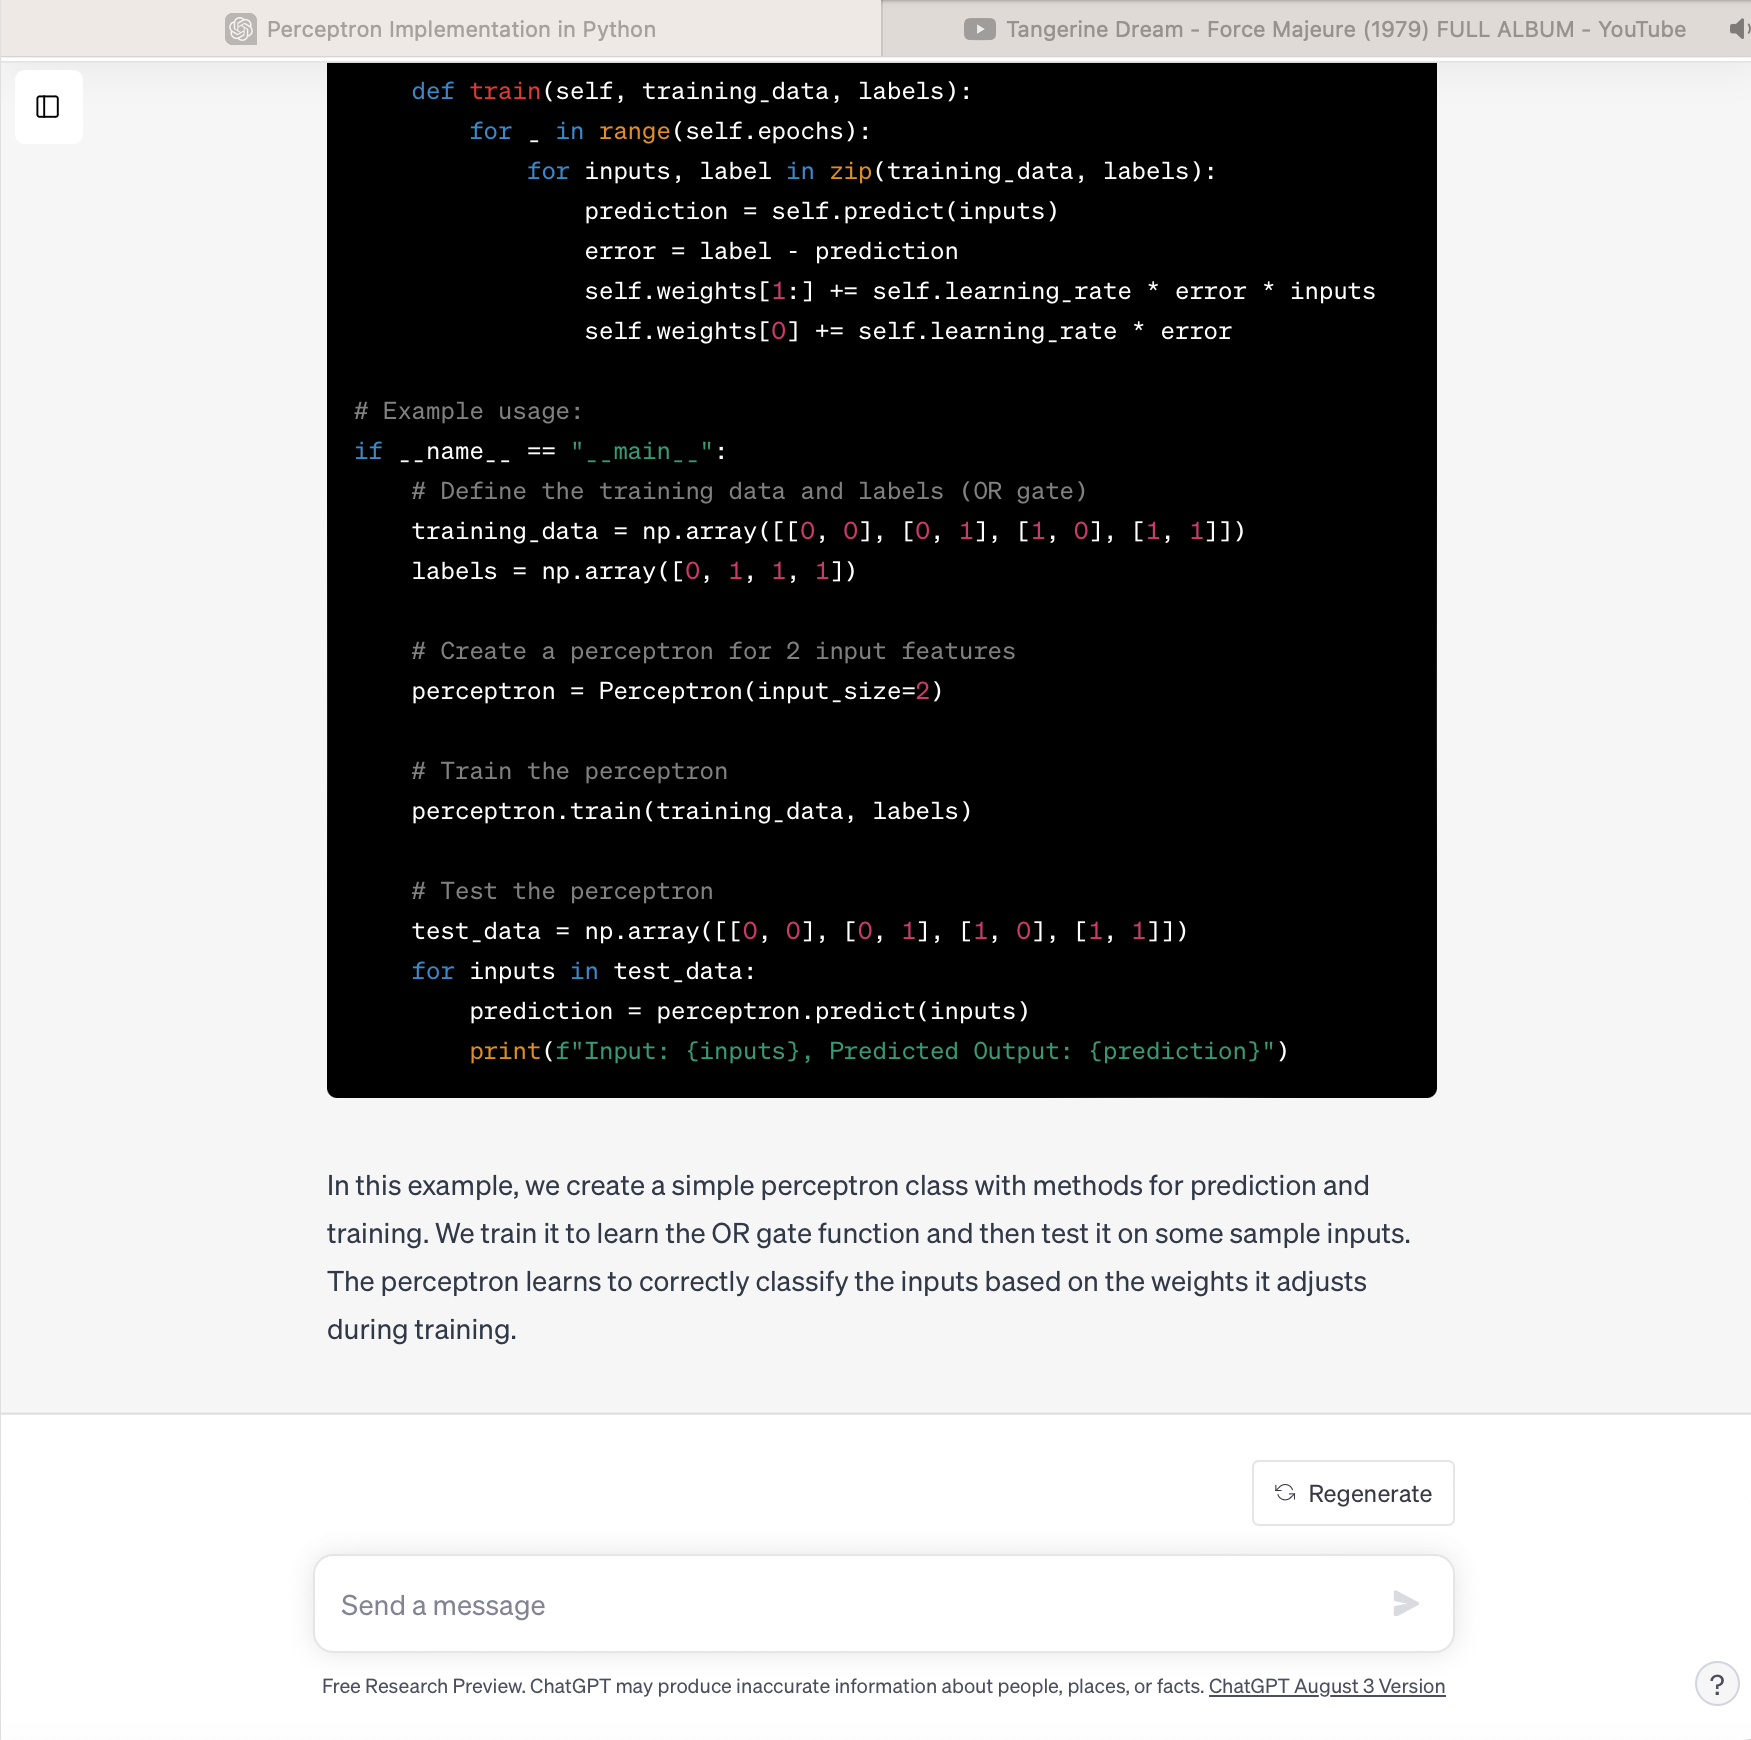

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


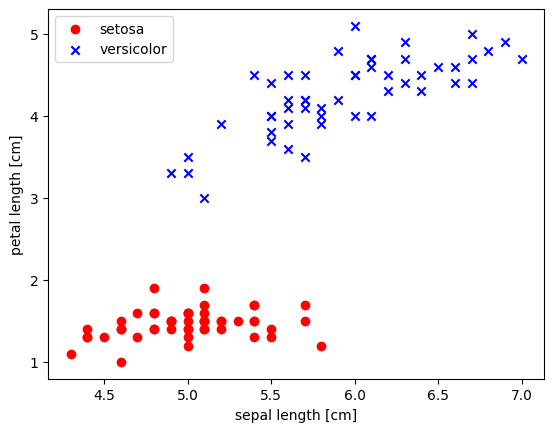

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [ ]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

<br>Double click here to type your answer.
<br>
<br>
<br>
<br>

In [ ]:
w0 = 5.0
w1 = -0.1
w2 = 4.5
eta = 0.1 # learning rate

data_points = np.array([[5.4, 1.7],
                        [4.6, 1.4],
                        [5.0, 1.5],
                        [4.4, 1.4],
                        [4.9, 1.5]]) #used points from setosa

true_labels = np.array([-1, -1, -1, -1, -1]) # true labels

def update_weights(weights, data_point, true_label):
    x0, x1, x2 = 1, data_point[0], data_point[1]  # Set x0 to 1 for bias term

    #apply prediction
    predicted_label = np.sign(weights[0]*x0 + weights[1]*x1 + weights[2]*x2)

    #Update all the weights
    weights[0] += eta * (true_label - predicted_label) * x0
    weights[1] += eta * (true_label - predicted_label) * x1
    weights[2] += eta * (true_label - predicted_label) * x2
    return weights

#Update each data point
for i, data_point in enumerate(data_points):
    w0, w1, w2 = update_weights([w0, w1, w2], data_point, true_labels[i])

# print results
print("w0 =", w0)
print("w1 =", w1)
print("w2 =", w2)






w0 = 4.3999999999999995
w1 = -2.9800000000000004
w2 = 3.6000000000000005


In this perceptron learning algorithm I started with initial weights w0, w1, and w2, and a learning rate (eta). I loop through each point and update the weights based on whether the model's prediction matches the true label for that point. If the the prediction is right it does not change anything. If the prediction is wrong the weights are adjusted to move the prediction closer to the true label. The goal is to find weights that correctly classify all the data points. After iterating through all data points, the code prints out the final weights.

This is the chat gpt template I followed.

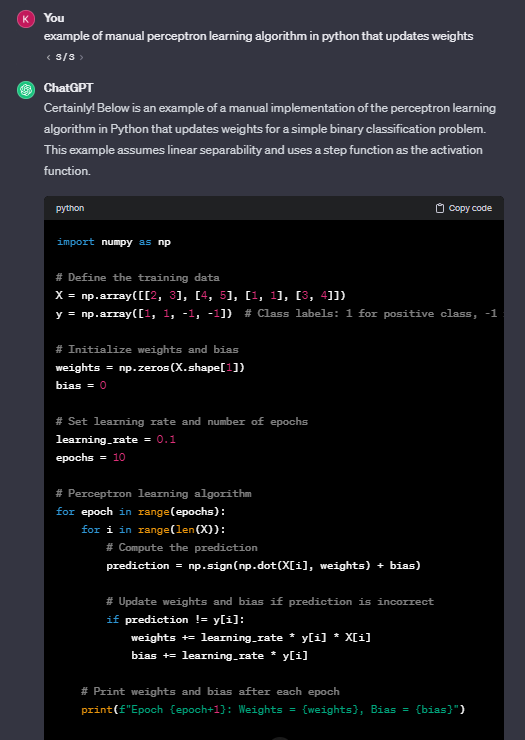

In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.n_iterations_ = 0 #this keeps track of iterations
        self.weights_history_ = [] # keeps list of weight history
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #update = self.eta * (self.predict(xi) - target) # this is the error
                update = self.eta * (target - self.predict(xi)) # This is the correected result
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors) #adds error into error list
            self.n_iterations_ += 1 #adds number of iterations in iterations list
            self.weights_history_.append(self.w_.copy()) #adds weight of history

            ###### New code for doing nothing. - MEH
            this_code_does_nothing = True
            ######

            if errors == 0: # Stop when no more errors
                break

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


There is a significant error in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The line containing the error is commented out, and a new line is added with corrected code.<br>
(ii) The fit function stops when no more iterations are necessary. <br>
(iii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

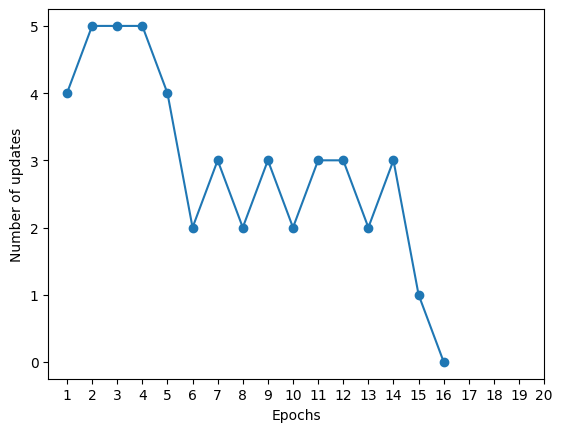

In [ ]:

ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

# 2.1
(i) Find values of  η  for which the process requires 10, 20, 30, and 40 iterations to converge.

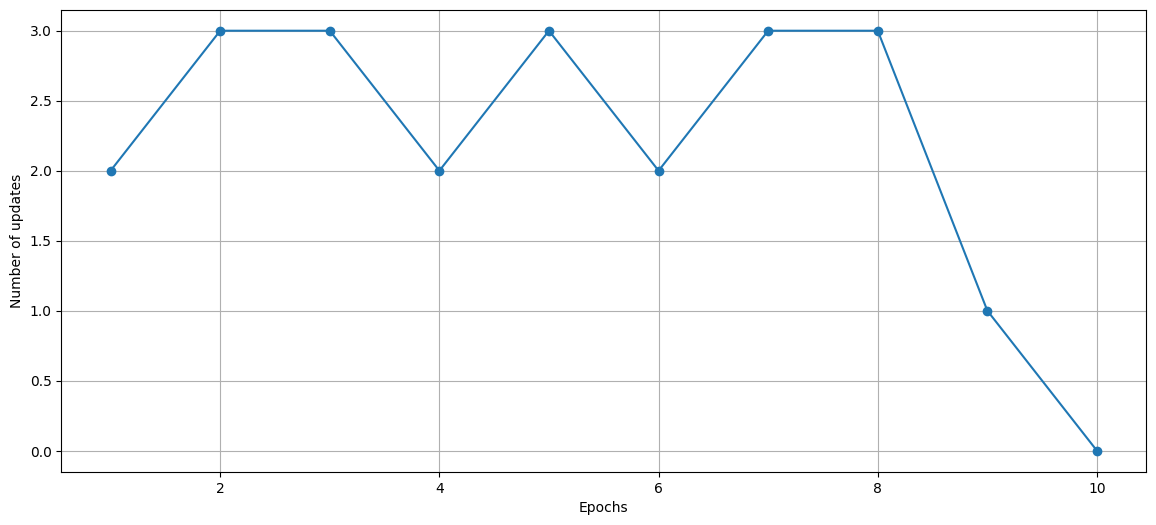

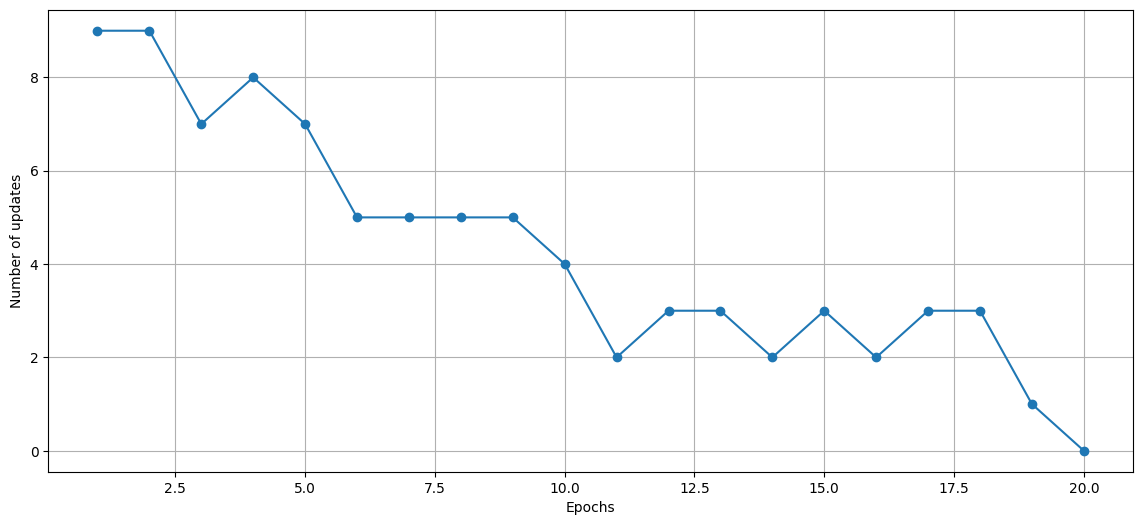

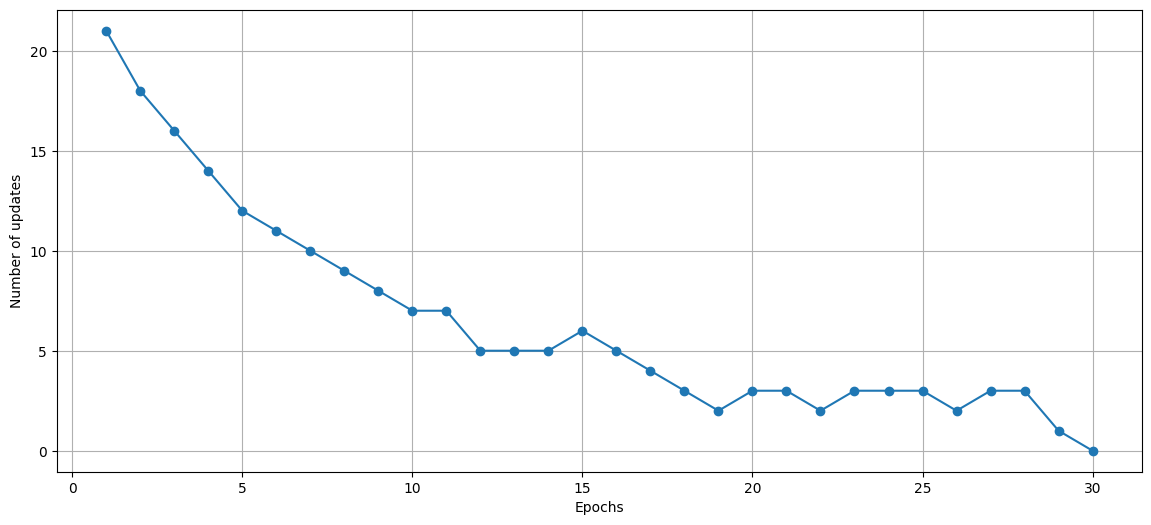

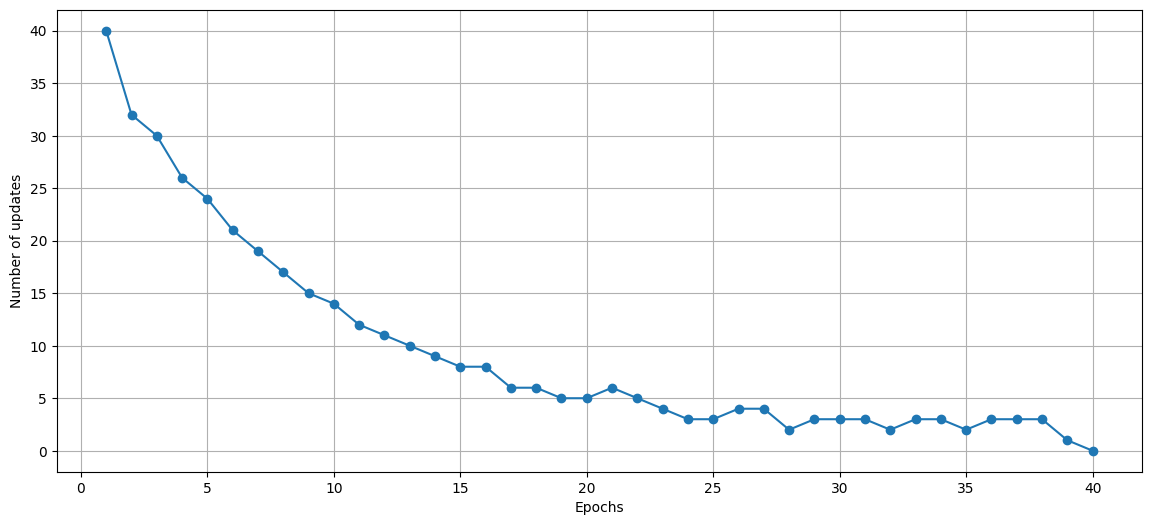

In [ ]:
def plot_errors(iterations, eta):
  ppn = Perceptron(eta=eta, n_iter=iterations, random_state=1)
  ppn.fit(X, y)
  plt.figure(figsize=(14, 6))
  plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
  plt.xlabel('Epochs')
  plt.ylabel('Number of updates')
  plt.grid(True)
  plt.show()


#calling each one
plot_errors(50, 0.0003)
plot_errors(50, 0.000047)
plot_errors(50, 0.00002)
plot_errors(50, 0.00001)
# this was trial and error and worked with points to get me closer to the epoch points 10,20,30,40


# 2.2
(ii) Is it always the case that raising  η  leads to a reduced (or equal) number of iterations? Explain with examples.

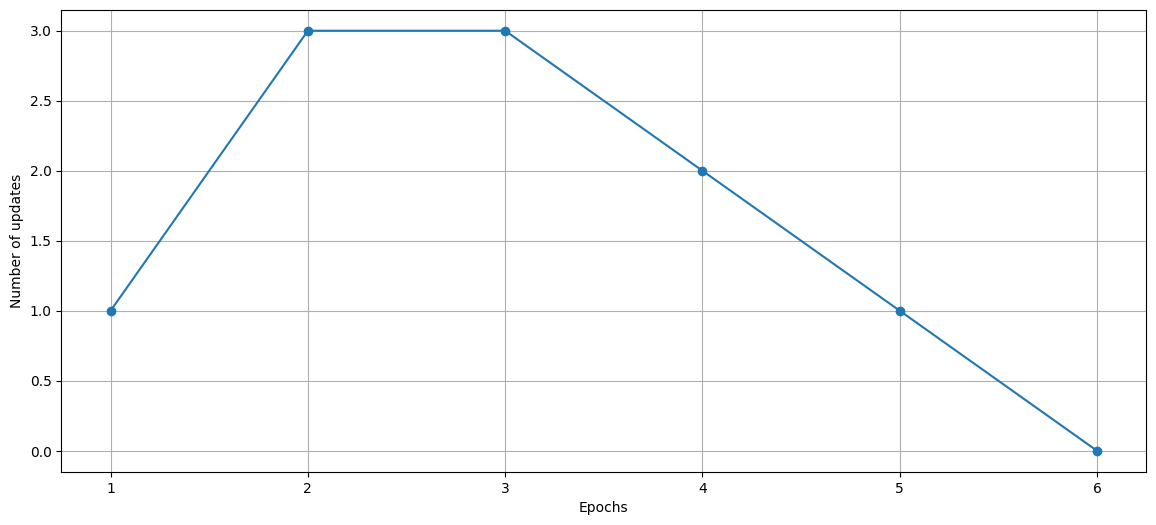

learning rate is 0.03


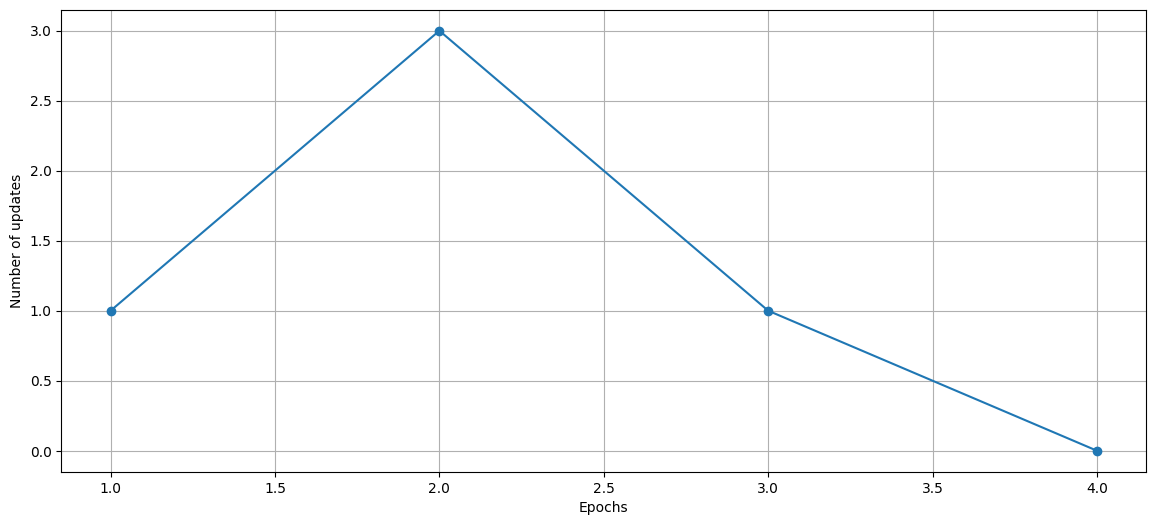

learning rate is 0.003


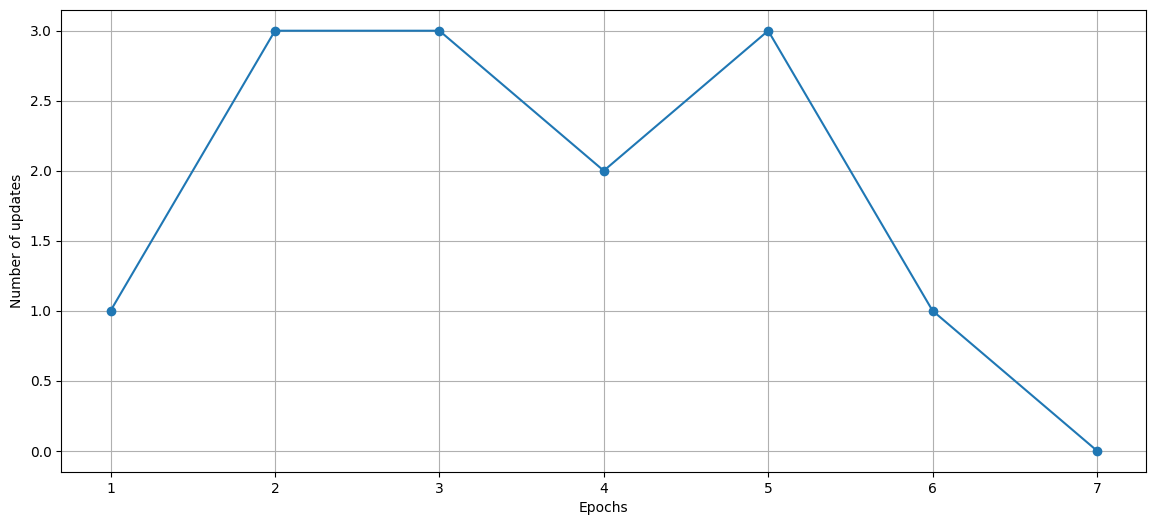

learning rate is 0.0055


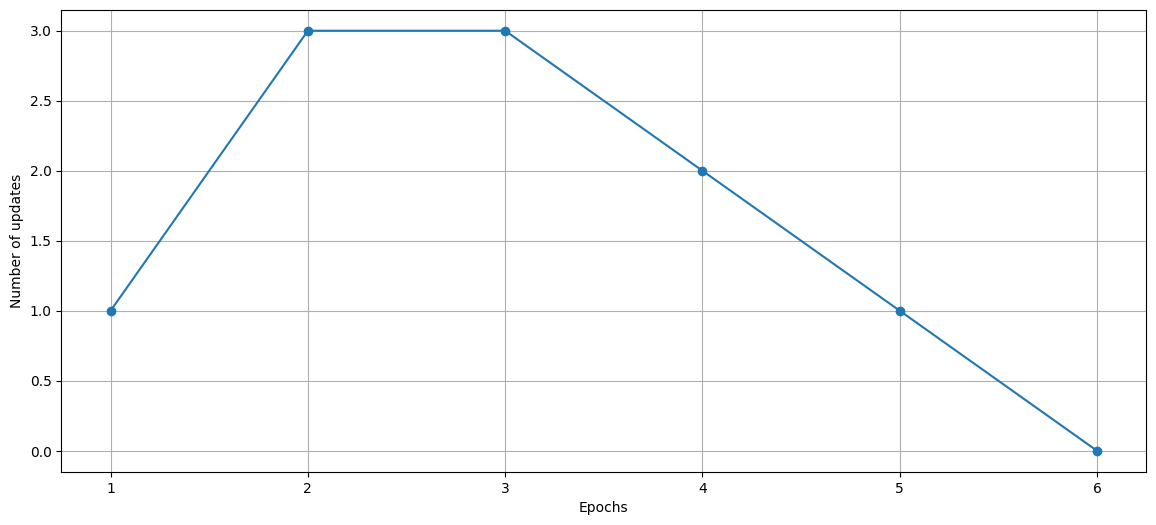

learning rate is 0.008


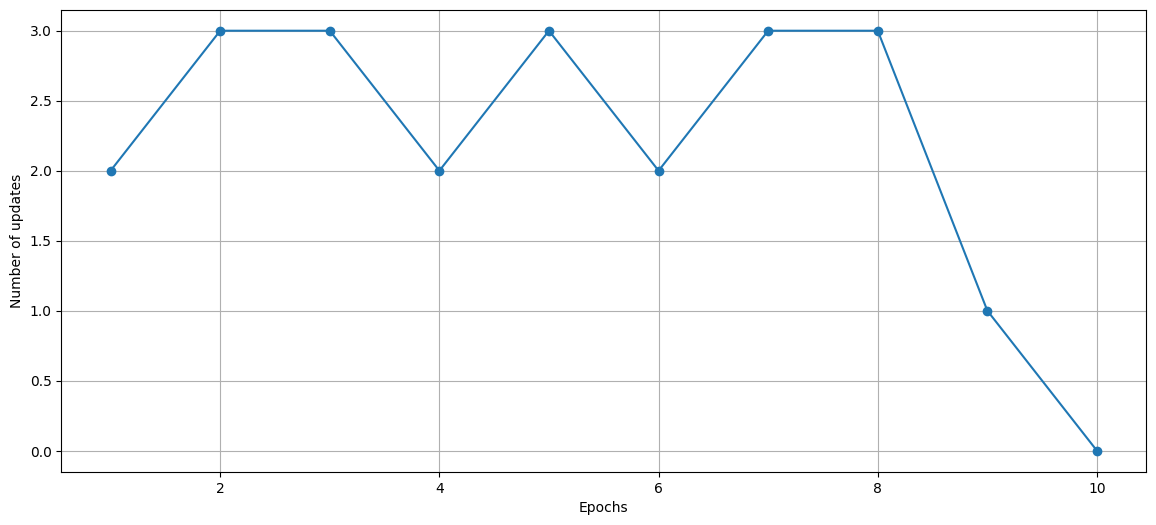

learning rate is 0.0003


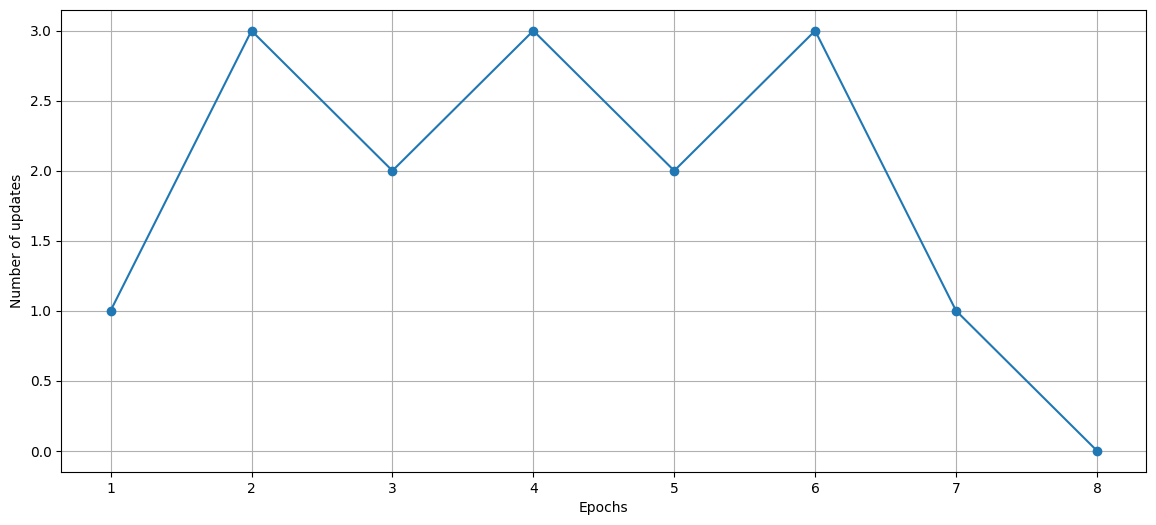

learning rate is 0.0008


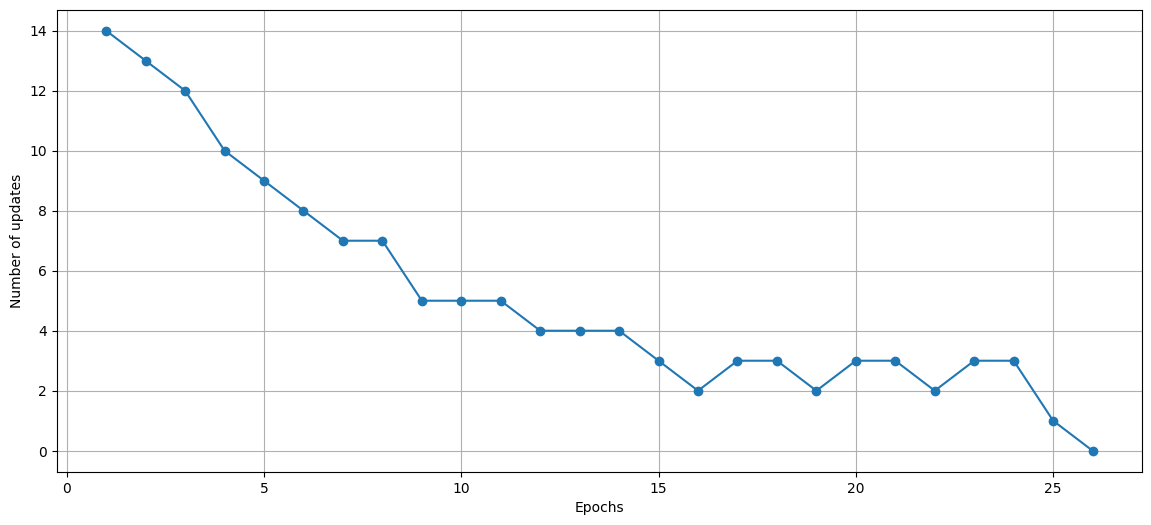

learning rate is 3e-05


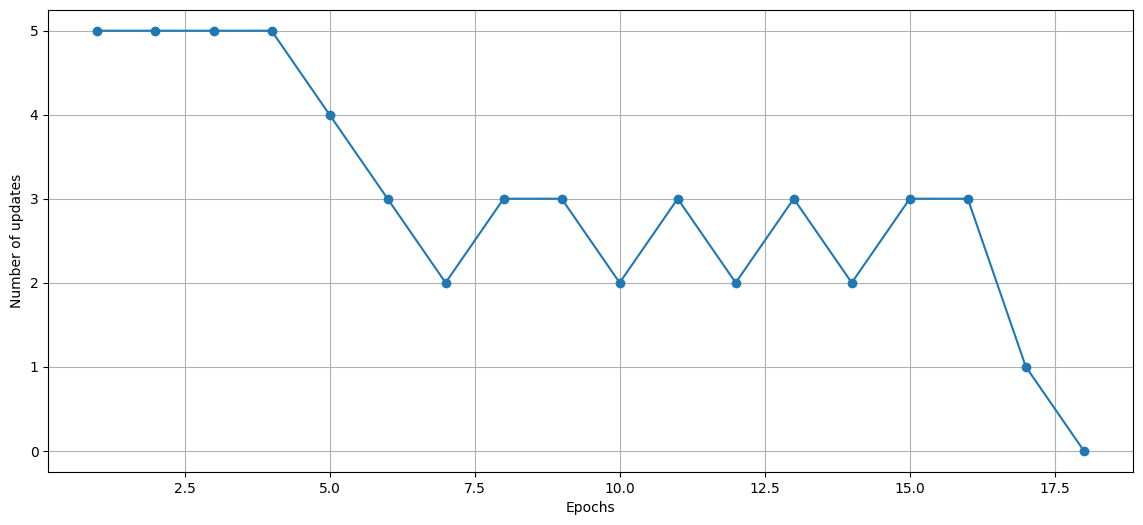

learning rate is 8e-05


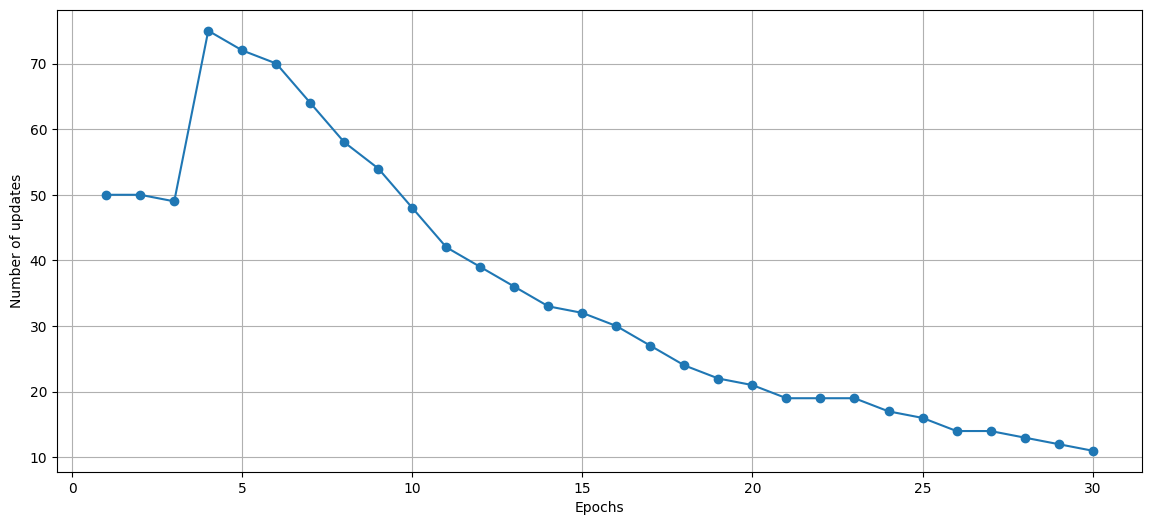

learning rate is 3e-06


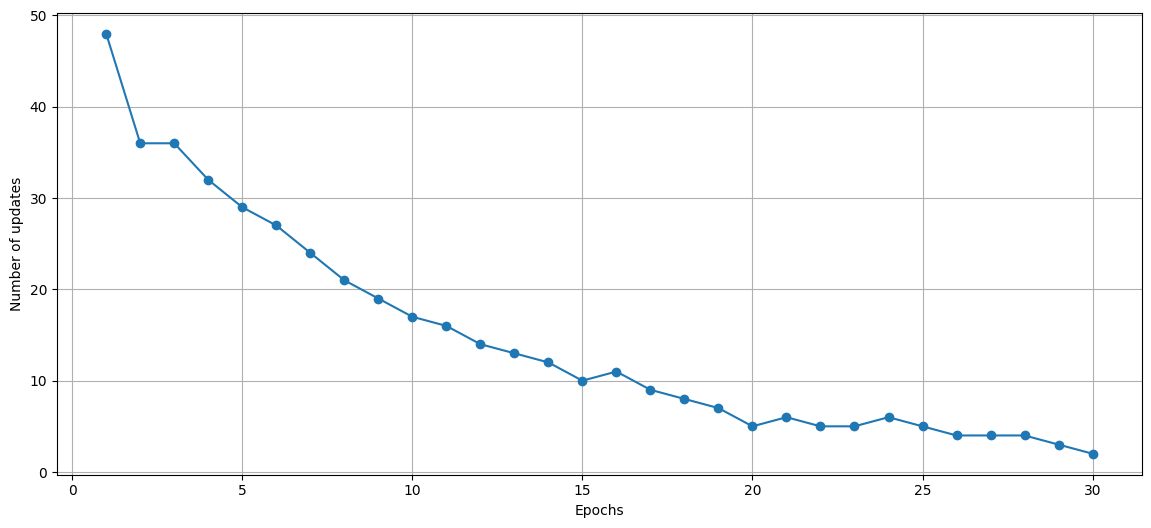

learning rate is 8e-06


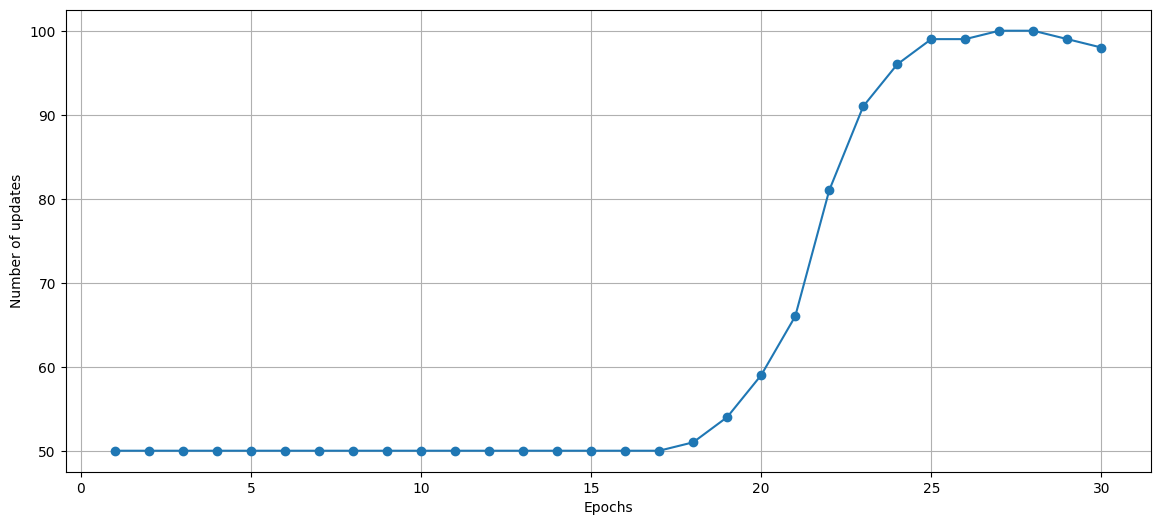

learning rate is 3e-07


In [ ]:
def plot_learning_rates(iterations, eta):
  ppn = Perceptron(eta=eta, n_iter=iterations, random_state=1)
  ppn.fit(X, y)
  plt.figure(figsize=(14, 6))
  plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
  plt.xlabel('Epochs')
  plt.ylabel('Number of updates')
  plt.grid(True)
  plt.show()

#calling each one
learning_rates = [0.03,0.003, 0.0055, 0.008, 0.0003, 0.0008, 0.00003, 0.00008, 0.000003, 0.000008, 0.0000003]
for i in learning_rates:
  plot_learning_rates(30, i)
  print(f'learning rate is {i}')


I kept the iterations the same but as I changed the learning rate in each iterations it seems to one change the epochs and 2 change the graph by a lot. Examlpes where the learning rate is 0.00003, 0.00008 show an increase in epochs but the learning rate 0.00003 is greater then 0.00008. This example proves that the a raising n does not always reduce or equal the amount of iterations.

# 2.3
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of  η .

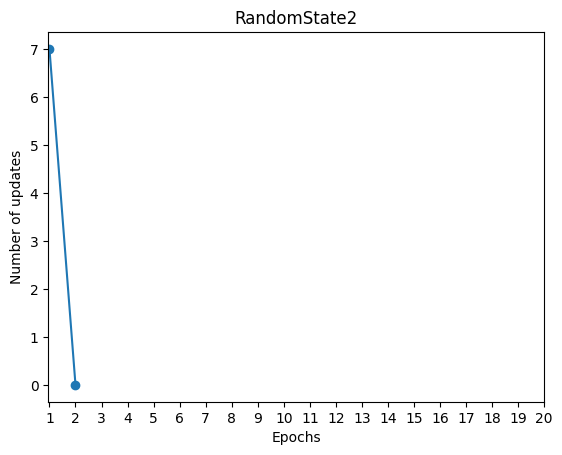

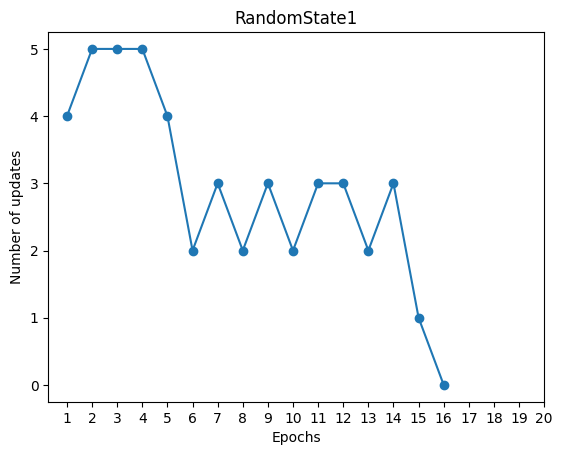

In [ ]:

ppn = Perceptron(eta=0.0001, n_iter=20, random_state=5)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.title('RandomState2')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()



# I did random_state 1 in the second graph because it changes the results for the graphs in question 4 because X and y changes.
# Not really an important change but just keeps the notebook more clear in the sense that the points do not change.

ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.title('RandomState1')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()



# 2.4
(iv) Based on your experiences in parts (i)-(iii), would binary search be an appropriate strategy for determining values of  η  for which the perceptron converges within a desired number of iterations?


From the examples above I do not think binary search is the best strategy for determines values of n within a desired number of iterations. Example 2 and 3 show a good example of why a slight change can cause a big change in the results. There could be a infinite number of options when trying to find the target value which could also be quite costly in resources. Tuning the convergence rate of the perceptron algorithim is helpful but is still unpredictable when it comes to finding the desiered number of iterations. The best method I can think of is trial and error of a range of values and oberserving the behavior in the graphs.

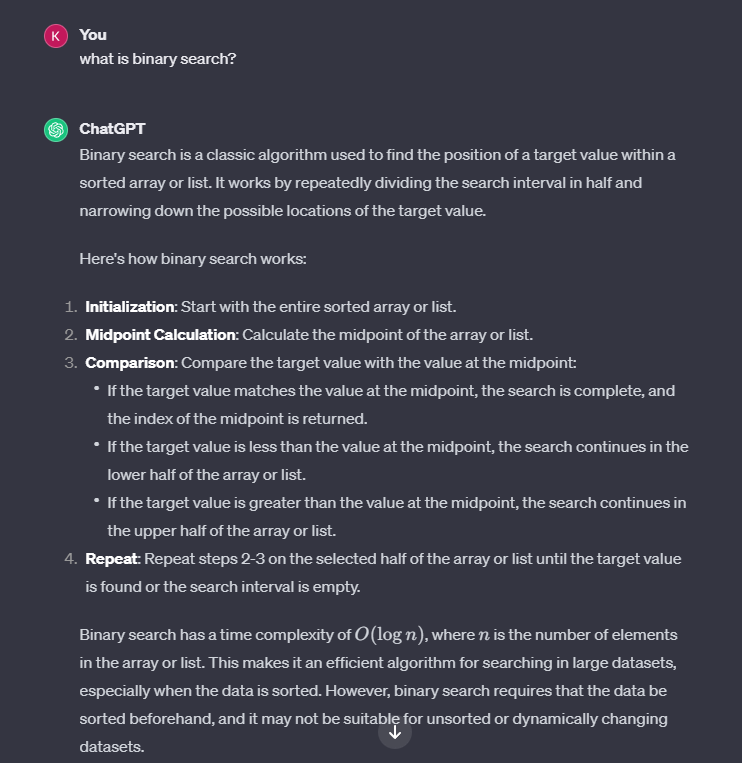

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions.

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

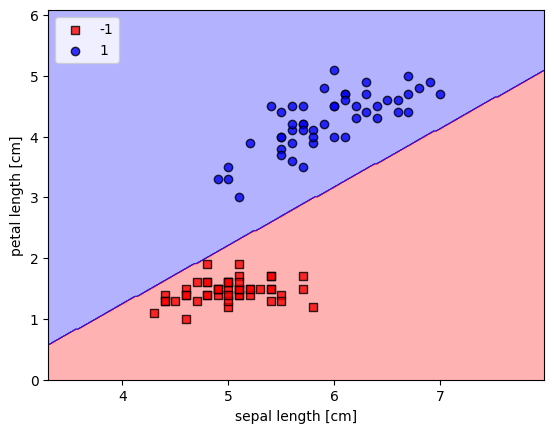

In [ ]:

from sklearn.svm import SVC
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()





Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

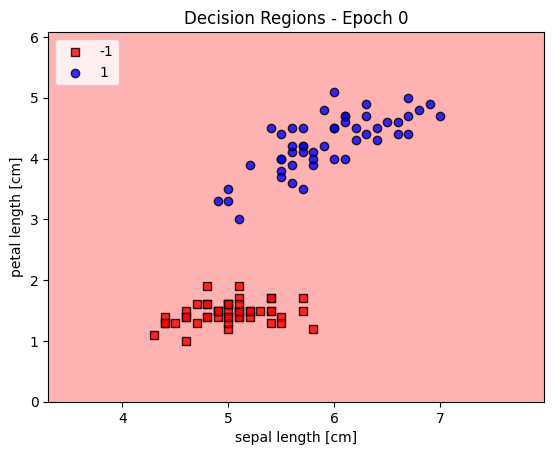

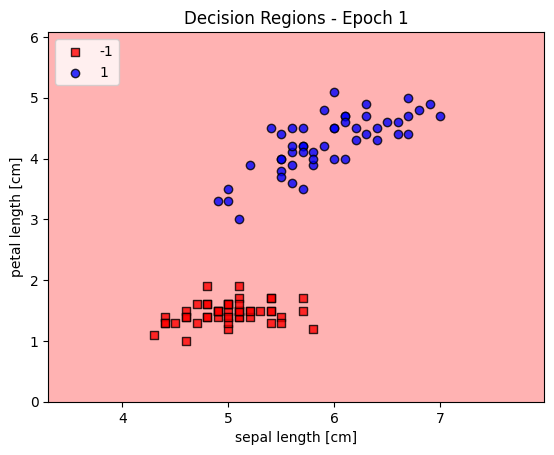

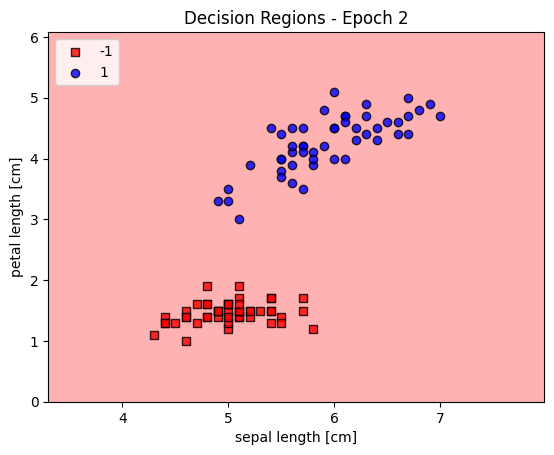

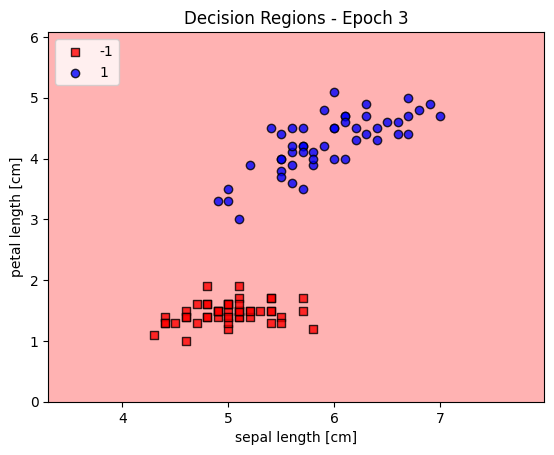

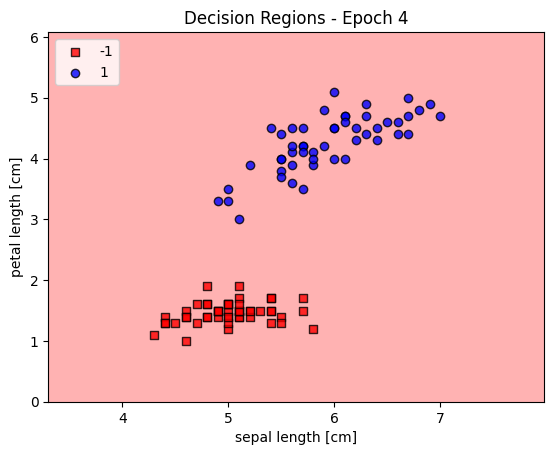

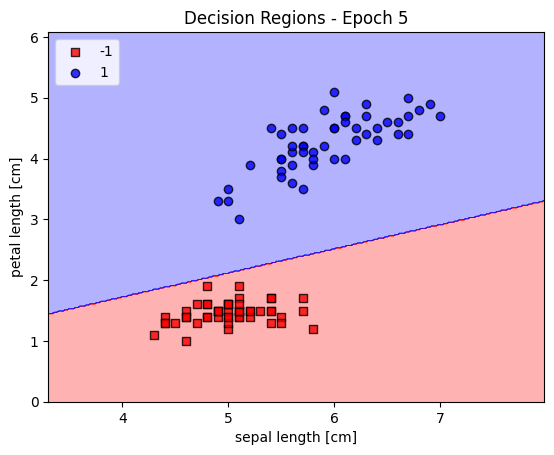

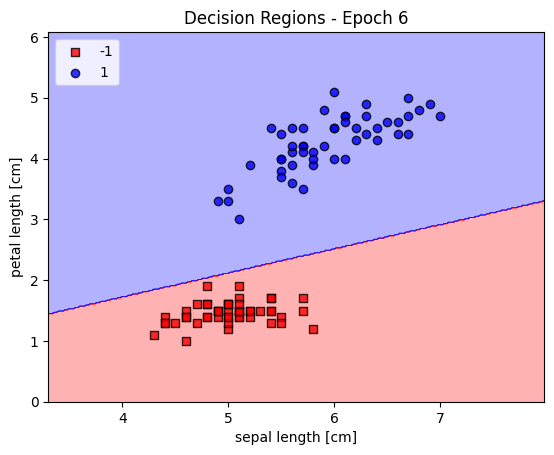

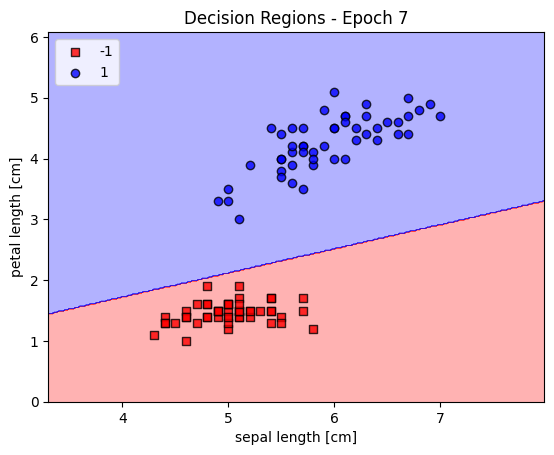

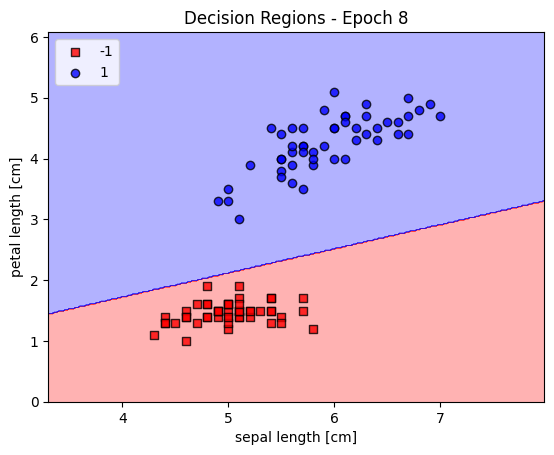

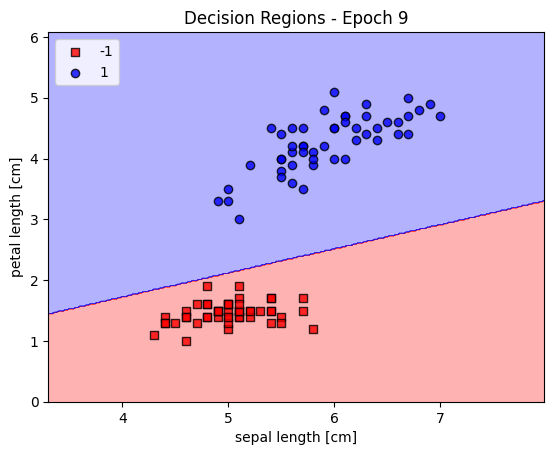

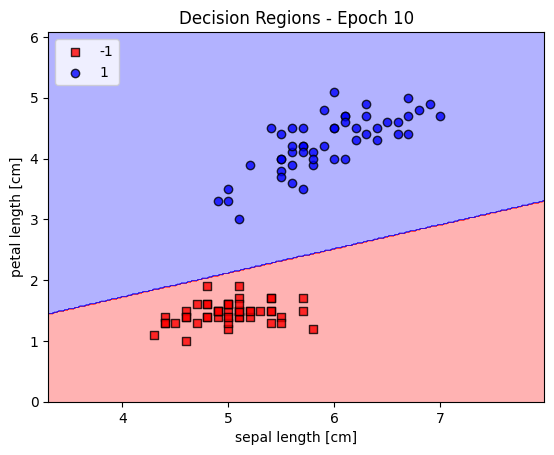

In [ ]:

# Initialize Perceptron
# Plot decision regions for the first 10 epochs
#ppn2 = Perceptron(eta=0.0001, n_iter=20, random_state=1)
# iterations changes to epochs in the for loop

for epoch in range(0, 11):
    # Plot decision regions
    ppn2 = Perceptron(eta=0.01, n_iter=epoch, random_state=1)
    ppn2.fit(X, y)
    plt.figure()
    plot_decision_regions(X, y, classifier=ppn2)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(f'Decision Regions - Epoch {epoch}')
    plt.legend(loc='upper left')
    plt.show()


(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

In [ ]:
# establish a random shuffle
s = np.arange(X.shape[0])
np.random.shuffle(s)
# shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];

print(X_shuffle[:10],y_shuffle[:10])

[[6.  4.5]
 [5.2 3.9]
 [5.1 3. ]
 [5.8 3.9]
 [5.7 4.2]
 [5.8 1.2]
 [6.  4. ]
 [4.4 1.4]
 [5.4 4.5]
 [5.1 1.6]] [ 1  1  1  1  1 -1  1 -1  1 -1]


Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

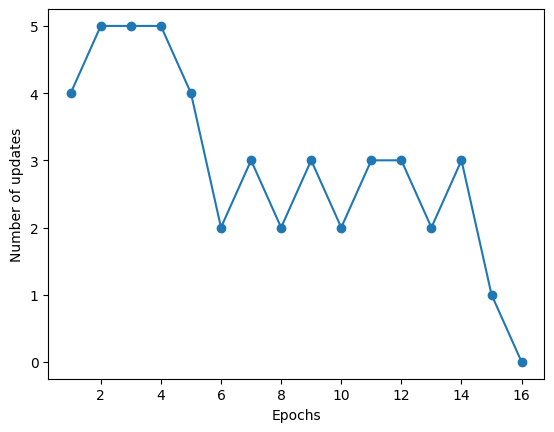

In [ ]:

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# this changed because of the

# 4.1
(i) Pick a sufficiently small value of  η , so that convergence takes 20 iterations or more.


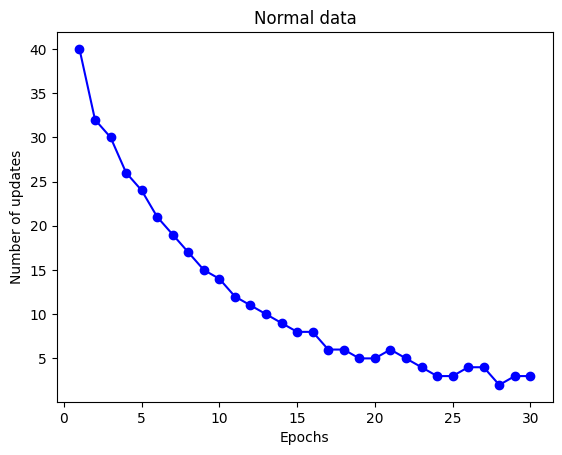

In [ ]:
ppn = Perceptron(eta=0.00001, n_iter=30, random_state=1)
normal_data = ppn.fit(X, y)

plt.plot(range(1, len(normal_data.errors_) + 1), normal_data.errors_, marker='o', label='Normal', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Normal data")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# 4.2
(ii) Add an extra line that fits the perceptron on the shuffled data.

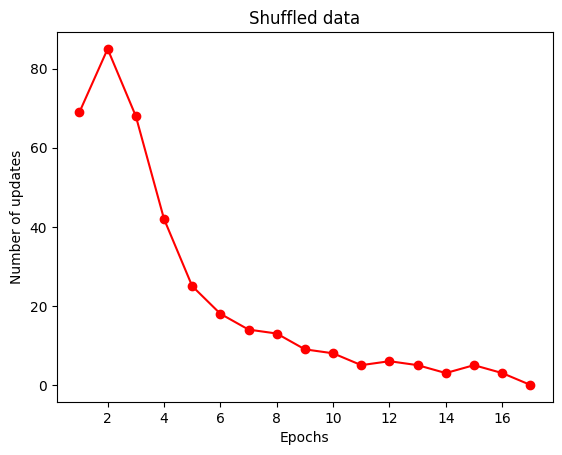

In [ ]:
ppn_shuffled = Perceptron(eta=0.00001, n_iter=30, random_state=1)

shuffled_data = ppn_shuffled.fit(X_shuffle, y_shuffle)

plt.plot(range(1, len(shuffled_data.errors_) + 1), shuffled_data.errors_, marker='o', color="red")
# plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Shuffled data")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# 4.3
(iii) Plot the error for both training processes (the original data and the shuffled data).


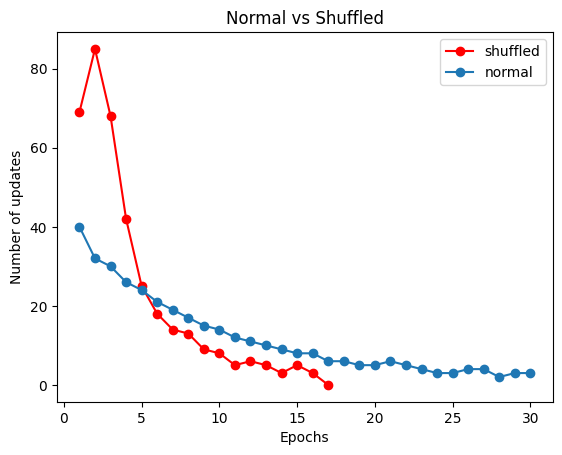

In [ ]:
plt.plot(range(1, len(shuffled_data.errors_) + 1), shuffled_data.errors_, marker='o', color="red", label="shuffled")
plt.plot(range(1, len(normal_data.errors_) + 1), normal_data.errors_, marker='o', label="normal")
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.legend(loc='upper right')
plt.title("Normal vs Shuffled")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

# 4.4
(iv) What do you observe?

In the comparison of both datasets the shuffled data has a lot more errors but over iterations and applying the learning rate it tends to smooth out and almost match the normal data.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use ChatGPT to answer the question? Was ChatGPT helpful in resolving it?

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

# 5.1
(1) Give your own answer to the above question.

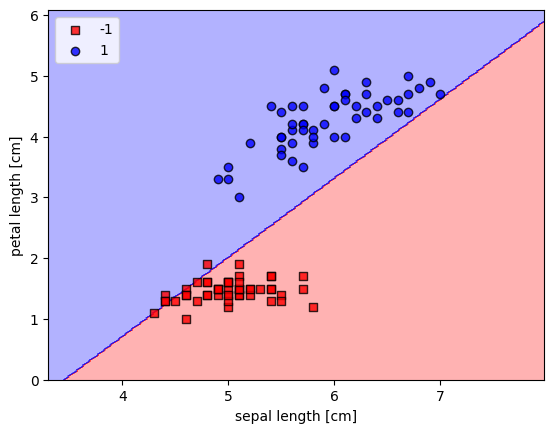

In [ ]:
# using the same plot_decision_regions as before in question 3.
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()


-----------------------
-----------------------
-----------------------


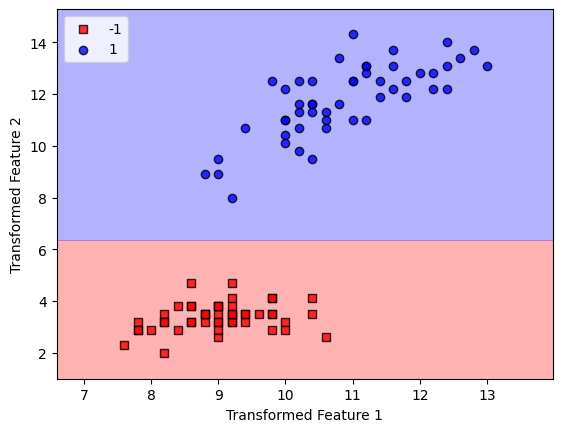

In [ ]:
# creating a function for linear tranformation
def linear_transform(X, a, b, c):
    return np.column_stack((a * X[:, 0] - c, b * X[:, 1] - c))

a = 2
b = 3
c = 1
X_transformed = linear_transform(X, a, b, c)

svc = SVC(kernel='linear')
svc.fit(X_transformed, y)


plot_decision_regions(X_transformed, y, classifier=svc)
plt.xlabel('Transformed Feature 1')
plt.ylabel('Transformed Feature 2')
plt.legend(loc='upper left')

plt.show()


I applied the linear transformation in the results above. Since the transformation is done on all data the relationships are the same because they are dependent. The weights are also scaled the same as the data because the equation is affecting the entire dataset. Because the current data is linearly separable if the transformation is too great it can cause the dataset to not be linearly separable. This is because it depends on the dataset how it is being transformed and what effects the transformation can have. The weights are an important factor for this because they could drastically change the results. If there was a theoretical good perceptron for the original dataset the weights of the perceptron would be determined from the learning process. The weights would be adjusted to correctly classify the data points within the process. To find weights on the transformed dataset the perceptron would adjust the weights to minimize classification errors. Some possible issues in the transformed dataset can be the linear regression or in the example graph above the split. The data points shifted in coordinates, spacing from one another, and the linear regression line split. It was a positive diagonal line but after the transformation, the line became a straight horizontal line.

# 5.2
(2) What happens when you use ChatGPT to answer the question? Was ChatGPT helpful in resolving it?

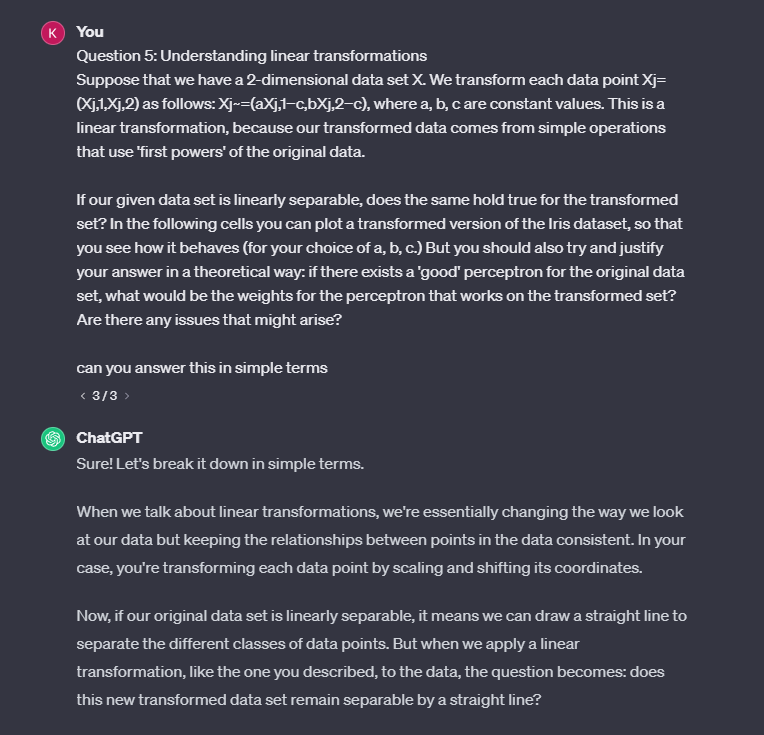

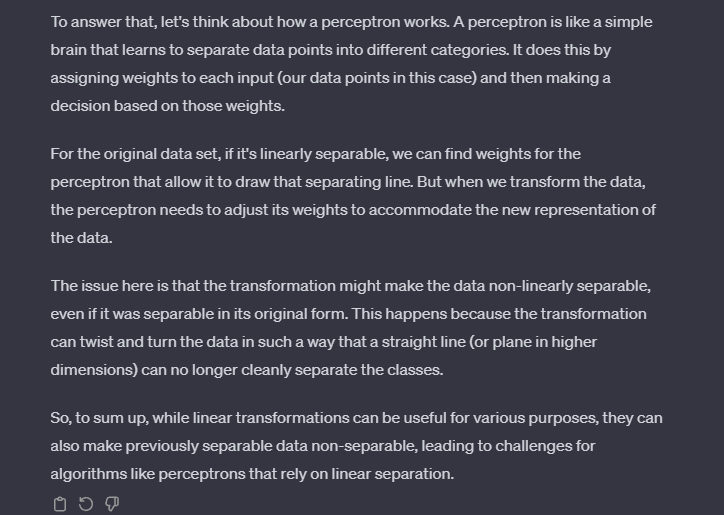

When I specially asked chat gpt to answer in simple terms the surprised me with the answer because I was expecting a yes or no answer with an explanation. When it gave a reason to explain why it can be both this was actually useful for me because it broke it down into simple terms. I was able to understand its answer and why it says the answer depends because that is true, the answer can very much depend on the dataset and how transformation takes place. In the second to last paragraph the example where transformation can make the data non-linearly separable is correct to an extent. Even though in my example above this wasn't proven if the transformation scatters the data and is no longer in a cluster this will be non-linearly separable data.

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[5,1] =


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(Replace this text by your ChatGPT screenshots. Create extra text cells if needed.)

In [ ]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [ ]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here
y_predicted = np.dot(X, w.T) + b
print(y_predicted)
# y_predicted =


[[-0.40459785]
 [-2.00290529]
 [-1.23368024]
 [-0.44830575]
 [-1.38922901]
 [-0.89505772]
 [-0.20559225]
 [-0.66923152]
 [-1.64398656]
 [-1.76537834]]


In [ ]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

y_ = np.random.randn(10,1)
print(y_)

w_updated = w - 0.1 * np.dot((y_predicted - y).T, X) / len(X) # divide by len(x) to normalizes the gradient descent update step by the number of data points in the dataset.
b_updated = b - 0.1 * sum(y_predicted - y) # folling same steps as w_updated but for Bias and not including the Xj

print('\n')
print(f'Inital Weights: {w}')
print(f'Updated Weights: {w_updated}')
print('\n')
print(f'Inital Bias: {b}')
print(f'Updated Bias: {b_updated}')


[[-0.30692569]
 [ 0.56405718]
 [-0.43063643]
 [-0.34788229]
 [ 1.34998084]
 [ 1.65363371]
 [ 1.20992564]
 [ 1.76758829]
 [-0.6978126 ]
 [ 0.41016231]]


Inital Weights: [[0.29457888 0.34729253 0.62488023]]
Updated Weights: [[0.34691914 0.39492091 0.52068555]]


Inital Bias: -1
Updated Bias: [0.52663251]


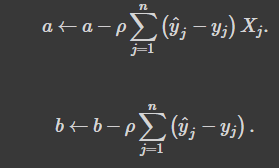

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore